# Observations for the night February 16th 2021

https://harvard.zoom.us/rec/play/N7umVF8Rk3vWvW_O3jkaTinofB2WxW3QKz0fVai_K-qvAYLt37uMrvskOlnBiMEjduSeQVzWT7_DDYzc.IY7Pqjef82YlWmZE?continueMode=true&_x_zm_rtaid=BjQYrDaETYeYRUMw8NQgLw.1613559822570.c813d210d38e378b719cb4048493df5b&_x_zm_rhtaid=205


- work with wl_2021_02
- use jupyter kernel LSST
- requires the installation https://github.com/mfisherlevine/summit
- requires to write in file {HOME}/notebooks/.user_setups


- March 9th 2021 : set to work with wl_2021_10

In [34]:
#!/bin/sh
# This file is expected to be found in ${HOME}/notebooks/.user_setups
#  It is a shell fragment that will be sourced during kernel startup
#  when the LSST kernel is started in a JupyterLab environment.  It runs
#  in the user context and can contain arbitrary shell code.  Exported changes
#  in its environment will persist into the JupyterLab Python environment.

#    setup -j rapid_analysis -r ${HOME}/repos/rapid_analysis
#    setup -j atmospec       -r ${HOME}/repos/atmospec

In [1]:
# correct for bug in stack in wl_2021_02
%config IPCompleter.use_jedi=False

# Import

In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from matplotlib.colors import LogNorm

In [3]:
import lsst.daf.persistence as dafPersist
import lsst.afw.display as afwDisplay
afwDisplay.setDefaultBackend("lsst.display.firefly")

In [4]:
! eups list -s

Spectractor           LOCAL:/home/dagoret/repos/w_2021_10/Spectractor 	setup
afw                   21.0.0-20-g09baf175d+e1e7d1c708 	current w_2021_10 setup
alert_packet          master-gbd80f2fea6 	current w_2021_10 setup
ap_association        21.0.0-6-gd3e26fa+20a6c0bac9 	current w_2021_10 setup
ap_pipe               21.0.0-10-gf688641+b6798eb8cf 	current w_2021_10 setup
ap_verify             21.0.0-10-ga0af1fc+919a499e71 	current w_2021_10 setup
astro_metadata_translator 0.1.0-22-g86269e8+6691386486 	current w_2021_10 setup
astshim               21.0.0-2-g45278ab+9f51b1e3f7 	current w_2021_10 setup
atmospec              LOCAL:/home/dagoret/repos/w_2021_10/atmospec 	setup
base                  21.0.0-6-g2d4f3f3+9f51b1e3f7 	current w_2021_10 setup
cbp                   21.0.0-2-g143869c+a9f57e981a 	current w_2021_10 setup
coadd_utils           21.0.0-2-g7f82c8f+2c5dd3b4f0 	current w_2021_10 setup
cp_pipe               21.0.0-10-gcf60f90+c974c5881c 	current w_2021_10 setup
ctrl_bps     

# Butler

In [5]:
butler=dafPersist.Butler("/project/shared/auxTel")

In [6]:
dayObs="2021-02-16"

In [7]:
seqNum=209

# Display

In [8]:
display1=afwDisplay.getDisplay(frame=1,port=80,name='sylviedc_debug1_2021_02_16',url=os.environ["FIREFLY_URL"])

In [9]:
raw=butler.get('raw',dayObs=dayObs,seqNum=seqNum)

In [10]:
display1.mtv(raw)

In [11]:
display1.getClient().display_url()

# Meta Query to the Butler

In [12]:
print(butler.queryMetadata('raw','seqNum',dayObs=dayObs))

[1, 2, 3, 5, 4, 6, 8, 7, 9, 10, 11, 12, 14, 13, 15, 16, 17, 18, 19, 20, 21, 22, 24, 23, 25, 26, 27, 28, 29, 30, 31, 32, 34, 33, 35, 37, 36, 38, 39, 40, 41, 42, 43, 45, 44, 46, 48, 47, 49, 51, 50, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 78, 77, 79, 80, 81, 82, 83, 84, 85, 86, 87, 89, 88, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 106, 104, 105, 103, 108, 110, 111, 107, 109, 115, 117, 112, 116, 114, 113, 124, 120, 119, 122, 125, 118, 123, 121, 129, 126, 131, 127, 130, 128, 135, 132, 137, 133, 134, 136, 142, 141, 139, 143, 140, 144, 138, 148, 145, 147, 146, 149, 151, 150, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

In [13]:
seqNums=butler.queryMetadata('raw','seqNum',dayObs=dayObs)

In [14]:
%config IPCompleter.use_jedi=False

# Information

In [15]:
info=raw.getInfo()

### The detector

In [16]:
detector=info.getDetector()

In [17]:
for amp in detector.getAmplifiers():
    print(amp.getName())

C10
C11
C12
C13
C14
C15
C16
C17
C07
C06
C05
C04
C03
C02
C01
C00


In [18]:
%config IPCompleter.use_jedi=False

### The visits

In [19]:
vi=info.getVisitInfo()

In [20]:
vi.getExposureTime()

90.0

In [21]:
vi.getBoresightParAngle()

1.93068 rad

In [22]:
vi.getBoresightRotAngle()

0 rad

In [23]:
vi.getWeather()

Weather(nan, nan, nan)

In [24]:
#!ls /home/dagoret/repos/rapid_analysis/python

In [25]:
#import sys
#sys.path.append("/home/dagoret/repos/rapid_analysis") # go to parent dir

# Rapid Analysis

Installed from https://github.com/mfisherlevine/summit

In [26]:
from lsst.rapid.analysis.nightReport import NightReporter
repoDir='/project/shared/auxTel'
reporter=NightReporter(repoDir,"2021-02-16")

Loaded data for seqNums 1 to 342


## Query the reporter

In [27]:
reporter.getObservedObjects()

['HD 50896', 'HD 74000', 'HD 185975', '35 Tau', 'HD 85552']

## The logbook

In [28]:
reporter.printObsTable(tailNumber=50)

{seqNum:4} {imageType:9} {obj:10} {timeOfDay} {filt:25} {dt.sec:6.1f}  {expTime:2.2f}
 293 engtest   HD 74000   07:38:33.419 RG610~empty                 74.9  20.00
 294 engtest   HD 74000   07:39:01.073 RG610~empty                 27.7  20.00
 295 science   HD 74000   07:46:09.109 RG610~empty                428.0  3.00
 296 science   HD 74000   07:46:37.016 RG610~empty                 27.9  3.00
 297 science   HD 74000   07:47:03.011 RG610~empty                 26.0  3.00
 298 engtest   HD 74000   07:48:03.905 RG610~empty                 60.9  20.00
 299 engtest   HD 74000   07:48:31.101 RG610~empty                 27.2  20.00
 300 engtest   HD 74000   07:49:47.974 RG610~empty                 76.9  20.00
 301 engtest   HD 74000   07:50:15.301 RG610~empty                 27.3  20.00
 302 engtest   HD 74000   07:51:32.243 RG610~empty                 76.9  20.00
 303 engtest   HD 74000   07:51:59.513 RG610~empty                 27.3  20.00
 304 engtest   HD 74000   07:53:13.843 RG610~emp

In [29]:
reporter.printObsTable()

{seqNum:4} {imageType:9} {obj:10} {timeOfDay} {filt:25} {dt.sec:6.1f}  {expTime:2.2f}
   1 bias      azel_target 19:50:22.184 empty~empty                  0.0  0.00
   2 bias      azel_target 20:18:03.588 empty~empty               1661.4  0.00
   3 bias      azel_target 20:18:16.563 empty~empty                 13.0  0.00
   4 bias      azel_target 20:18:29.581 empty~empty                 13.0  0.00
   5 bias      azel_target 20:18:42.546 empty~empty                 13.0  0.00
   6 bias      azel_target 20:18:55.559 empty~empty                 13.0  0.00
   7 bias      azel_target 20:19:08.591 empty~empty                 13.0  0.00
   8 bias      azel_target 20:19:21.577 empty~empty                 13.0  0.00
   9 bias      azel_target 20:19:33.582 empty~empty                 12.0  0.00
  10 bias      azel_target 20:19:46.572 empty~empty                 13.0  0.00
  11 bias      azel_target 20:19:59.572 empty~empty                 13.0  0.00
  12 bias      azel_target 20:20:12.574 empty

## Butler Query meta data

In [30]:
ids=butler.queryMetadata('raw',["dayObs", "seqNum"],object="HD 50896")

In [31]:
count=0
for dataid in ids:
    print(dataid)
    count+=1
    if count>10:
        break

('2021-02-16', 160)
('2021-02-16', 161)
('2021-02-16', 162)
('2021-02-16', 163)
('2021-02-16', 164)
('2021-02-16', 165)
('2021-02-16', 166)
('2021-02-16', 167)
('2021-02-16', 168)
('2021-02-16', 169)
('2021-02-16', 170)


## Some visualisation

In [32]:
%matplotlib inline

/home/dagoret/repos/w_2021_10/rapid_analysis/python/lsst/rapid/analysis/nightReport.py:135: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111, polar=True)


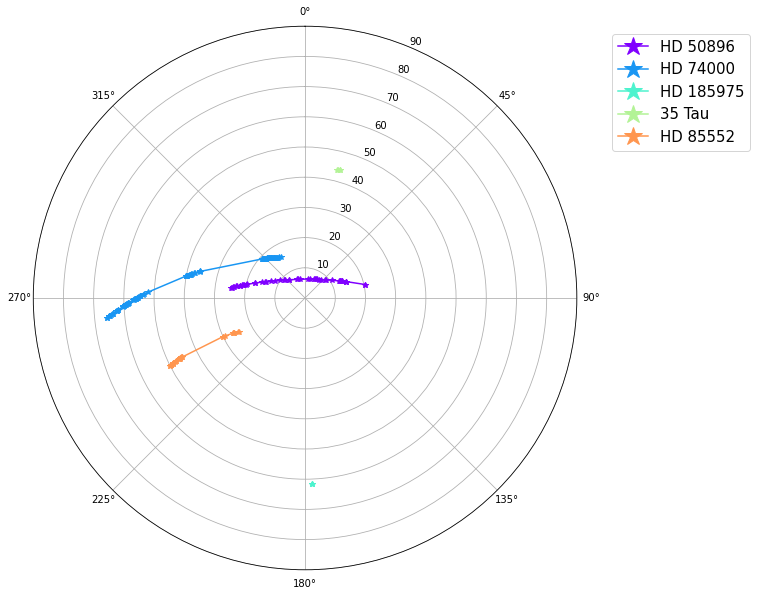

In [33]:
reporter.makePolarPlotForObjects()

In [34]:
reporter.plotPerObjectAirMass(versusMjd=False)

TypeError: plotPerObjectAirMass() got an unexpected keyword argument 'versusMjd'

In [35]:
exp=butler.get('quickLookExp',dayObs=dayObs,seqNum=seqNum)

NoResults: No locations for get: datasetType:quickLookExp dataId:DataId(initialdata={'dayObs': '2021-02-16', 'seqNum': 209}, tag=set())

In [ ]:
display1.mtv(exp)

In [ ]:
fig=plt.figure(figsize=(20,5))
ax1=fig.add_subplot(131)
ax1.imshow(exp.image.array,origin="lower",cmap="jet")
ax2=fig.add_subplot(132)
ax2.imshow(exp.mask.array,origin="lower",cmap="jet")
ax3=fig.add_subplot(133)
ax3.imshow(exp.variance.array,origin="lower",cmap="jet")

In [ ]:
exp.image.array.shape

In [ ]:
raw.image.array.shape

## Meta Data

In [36]:
md=butler.get("raw_md",dayObs=dayObs,seqNum=seqNum)

In [37]:
md.toDict()

{'SIMPLE': True,
 'EXTEND': True,
 'COMMENT': ["  FITS (Flexible Image Transport System) format is defined in 'Astronomy",
  "  and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H",
  "= '        '",
  '---- Date, night and basic image information ----',
  "= '        '",
  '---- Telescope info, location, observer ----',
  "= '        '",
  '---- Pointing info, etc. ----',
  "= '        '",
  '---- TAN Projection ----',
  "= '        '",
  '---- Image-identifying used to build OBS-ID ----',
  "= '        '",
  '---- Test Stand information ----',
  "= '        '",
  '---- Information from Camera (Common block) ----',
  "= '        '",
  '---- Information from Camera ----',
  "= '        '",
  '---- Filter/grating information ----',
  "= '        '",
  '---- Exposure-related information ----',
  "= '        '",
  '---- Weather information ----',
  "= '        '",
  '---- Header information ----',
  "= '        '",
  '---- Checksums ----',
  '---- Information from Camera

In [38]:
rowNum=2005

In [39]:
plt.plot(range(1700,1900),exp.image.array[rowNum,1700:1900])

NameError: name 'exp' is not defined

# Get images

In [40]:
plt.rcParams["axes.labelsize"] = 'large'
plt.rcParams['axes.titlesize'] = 'large'
plt.rcParams['xtick.labelsize']= 'large'
plt.rcParams['ytick.labelsize']= 'large'

In [41]:
# Logbook

# 155 science   35 Tau     22:16:52.177 RG610~holo4_003             18.3  1.00
# 156 engtest   azel_target 23:01:12.864 empty~empty               2660.7  1.00
# 157 flat      Park position 00:01:10.415 empty~holo4_003           3597.6  1.00
# 158 flat      Park position 00:02:50.885 empty~holo4_003            100.5  20.00
# 159 flat      Park position 00:05:16.055 empty~holo4_003            145.2  20.00
# 181 science   HD 50896   01:45:09.091 RG610~holo4_003            146.3  90.00
# 209 science   HD 50896   03:37:12.647 empty~holo4_003             87.4  90.00                                      

In [42]:
all_myseq = [155, 157,158,159,181,209]
all_imagename = ["tau","flat","flat","flat","HD50896","HD50896"]
all_filter = ["RG610","empty","empty","empty","RG610","empty"] 

In [43]:
Ncol=2
Nrow=3
Ntot=Ncol*Nrow

In [44]:
all_my_raw_array=[]
all_my_header=[]
for seqNum in all_myseq:
    raw=butler.get('raw',dayObs=dayObs,seqNum=seqNum)
    md=butler.get("raw_md",dayObs=dayObs,seqNum=seqNum)
    all_my_raw_array.append(np.copy(raw.image.array))
    all_my_header.append(md.toDict())

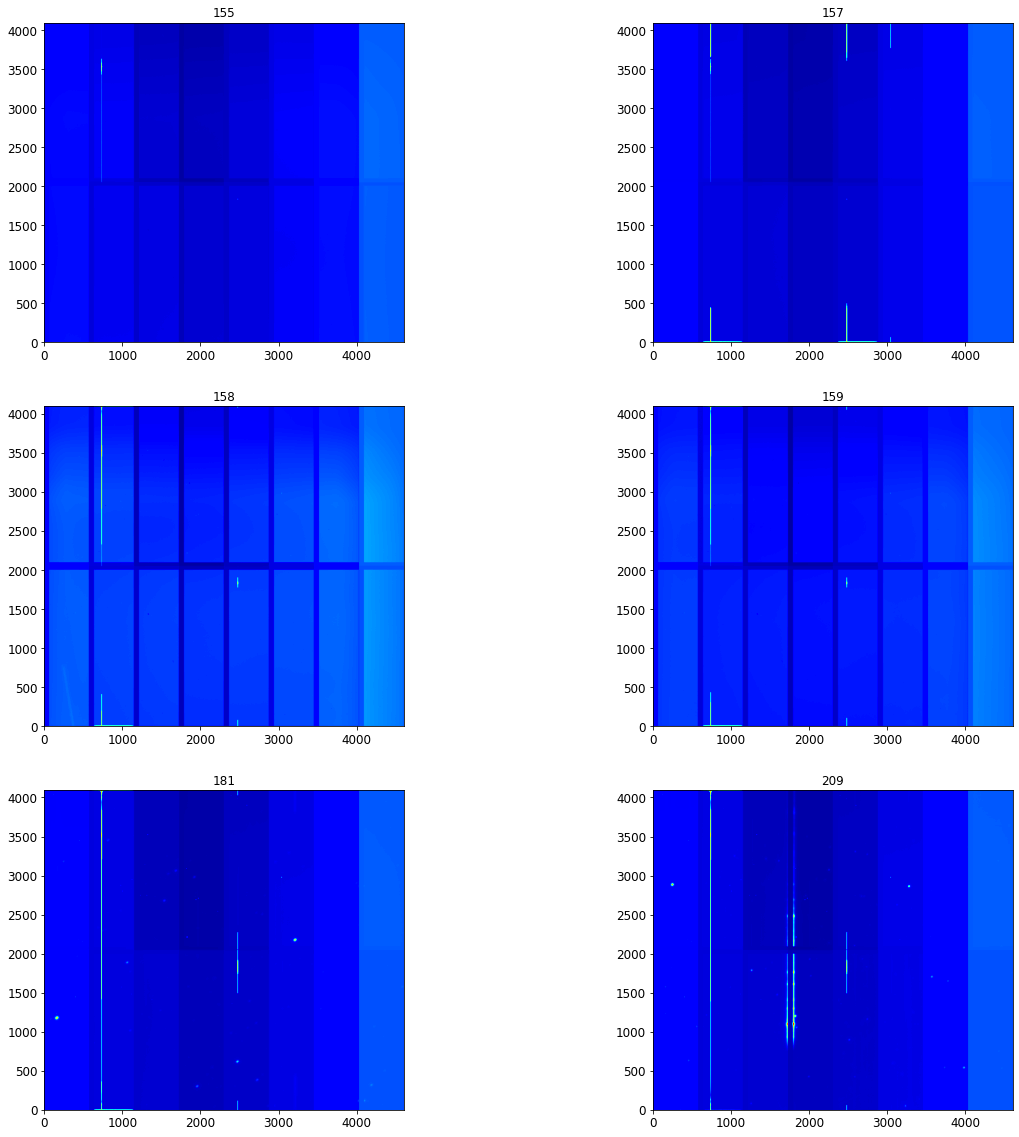

In [45]:
fig = plt.figure(figsize=(20,20))

# loop on angle
for idx in np.arange(Ntot):
    ax=fig.add_subplot(Nrow,Ncol,idx+1)
    ax.imshow(all_my_raw_array[idx],origin='lower',cmap="jet",norm=LogNorm())
    ax.set_title(all_myseq[idx])

# Save image

In [46]:
from astropy.io import fits

In [47]:
FLAG_SAVE_IMAGE = True

In [48]:
if FLAG_SAVE_IMAGE:
    idx=0
    for seqNum in all_myseq:
        filename="holo4_003"+"_"+all_filter[idx]+"_"+all_imagename[idx]+"_"+dayObs+"_"+str(seqNum)+".fits"
        print(filename)
    
        hdr = fits.Header()
    
        for key,value in all_my_header[idx].items():
            hdr[str(key)]=value
        
        hdu = fits.PrimaryHDU(data=all_my_raw_array[idx],header=hdr)  # with headers
        #hdu = fits.PrimaryHDU(data=all_my_raw_array[idx])
    
        hdul = fits.HDUList([hdu])
    
        hdul.writeto(filename,overwrite=True)
    
        idx+=1

holo4_003_RG610_tau_2021-02-16_155.fits
holo4_003_empty_flat_2021-02-16_157.fits
holo4_003_empty_flat_2021-02-16_158.fits
holo4_003_empty_flat_2021-02-16_159.fits
holo4_003_RG610_HD50896_2021-02-16_181.fits
holo4_003_empty_HD50896_2021-02-16_209.fits


In [49]:
if FLAG_SAVE_IMAGE:
    idx=0
    for seqNum in all_myseq:
        filename="holo4_003"+"_"+all_filter[idx]+"_"+all_imagename[idx]+"_"+dayObs+"_"+str(seqNum)+"_noheader.fits"
        print(filename)
    
        hdr = fits.Header()
    
        for key,value in all_my_header[idx].items():
            hdr[str(key)]=value
        
        #hdu = fits.PrimaryHDU(data=all_my_raw_array[idx],header=hdr)  # with headers
        hdu = fits.PrimaryHDU(data=all_my_raw_array[idx])
    
        hdul = fits.HDUList([hdu])
    
        hdul.writeto(filename,overwrite=True)
    
        idx+=1

holo4_003_RG610_tau_2021-02-16_155_noheader.fits
holo4_003_empty_flat_2021-02-16_157_noheader.fits
holo4_003_empty_flat_2021-02-16_158_noheader.fits
holo4_003_empty_flat_2021-02-16_159_noheader.fits
holo4_003_RG610_HD50896_2021-02-16_181_noheader.fits
holo4_003_empty_HD50896_2021-02-16_209_noheader.fits
